<a href="https://colab.research.google.com/github/victorlee0923-creator/ML_Book_Practice/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E8%AD%89%E7%85%A70_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df=pd.read_csv('/content/Pokemon_894_12.csv',header=0) #讀進來的df是一個表格型資料
df.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False
3,3,妙蛙花Mega,Grass,Poison,80,100,123,122,120,80,1,False
4,4,小火龍,Fire,NaN,39,52,43,60,50,65,1,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      894 non-null    int64 
 1   Name        894 non-null    object
 2   Type1       894 non-null    object
 3   Type2       473 non-null    object
 4   HP          894 non-null    int64 
 5   Attack      894 non-null    int64 
 6   Defense     894 non-null    int64 
 7   SpecialAtk  894 non-null    int64 
 8   SpecialDef  894 non-null    int64 
 9   Speed       894 non-null    int64 
 10  Generation  894 non-null    int64 
 11  Legendary   894 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 77.8+ KB


In [25]:
df.loc[:, 'HP':'SpecialDef'].describe()

,HP,Attack,Defense,SpecialAtk,SpecialDef
count,894.000000,894.000000,894.000000,894.000000,894.000000
mean,69.469799,79.848993,74.420582,73.428412,72.401566
std,25.670988,32.691003,31.323902,33.110134,27.963359
min,1.000000,5.000000,5.000000,10.000000,20.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000
50%,66.000000,75.000000,70.000000,65.000000,70.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000


In [26]:
# 計算平均值
print('HP平均值：', df['HP'].mean())

HP平均值： 69.46979865771812


In [27]:
# 計算中位數
print('HP中位數：', df['HP'].median())

HP中位數： 66.0


In [28]:
# 計算眾數
print('HP眾數：', df['HP'].mode())

HP眾數： 0    60
Name: HP, dtype: int64


In [29]:
# 計算最大值，最小值與全距(range)
print('HP最大值：', df['HP'].max())
print('HP最小值：', df['HP'].min())
print('HP全距：', df['HP'].max()-df['HP'].min())

HP最大值： 255
HP最小值： 1
HP全距： 254


In [30]:
#計算四分位數quantile
print('HP第1四分位數：', df['HP'].quantile(q=.25)) #那個q省略好像沒差
print('HP第3四分位數：', df['HP'].quantile(q=.75))
# 也可透過 describe() 取出
print('HP第3四分位數：', df['HP'].describe()[6])

HP第1四分位數： 50.0
HP第3四分位數： 80.0
HP第3四分位數： 80.0


/tmp/ipython-input-3383033642.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('HP第3四分位數：', df['HP'].describe()[6])


In [31]:
# 計算變異數、標準差
print('HP變異數：', df['HP'].var())
print('HP標準差：', df['HP'].std())

HP變異數： 658.9996467679268
HP標準差： 25.670988426001966


In [35]:
print('Covariance matrix(共變異數):') #計算共變異數
print(np.cov(df['HP'], df['Defense']))
print("------------------------------")
print('Correlation coefficients(相關係數):') #計算相關係數
print(np.corrcoef(df['HP'], df['Defense']))

Covariance matrix(共變異數):
[[658.99964677 191.94216764]
 [191.94216764 981.18685476]]
------------------------------
Correlation coefficients(相關係數):
[[1.         0.23869974]
 [0.23869974 1.        ]]


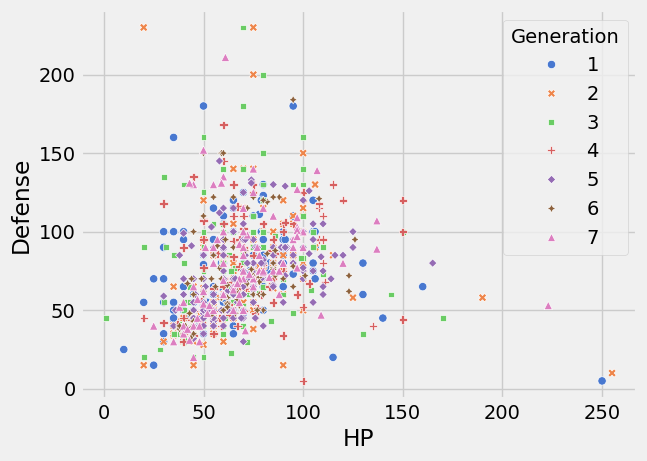

In [37]:
#繪製散點圖
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

cmap = sns.color_palette("muted", n_colors=7) #調色盤
sns.scatterplot(x='HP', y='Defense',
                data=df,
                hue='Generation', #顏色分類依據
                style='Generation', #形狀分類依據
                palette=cmap) #先前自訂的顏色組

circle=plt.Circle((150,1120),5,color='b',fill=False)
ax=plt.gca()
ax.add_artist(circle)

In [38]:
corr = df.loc[:, 'HP':'SpecialDef'].corr()